# RNN

In [13]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
max_features = 20000
max_len = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 80), (25000, 80))

In [15]:
model_layers = [
    Embedding(max_features, 32),
    SimpleRNN(16, input_shape=(max_features,max_len), activation="relu"),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 640,801
Trainable params: 640,801
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 0.4961 - accuracy: 0.7442 - val_loss: 0.3996 - val_accuracy: 0.8141
Epoch 2/10
782/782 [==============================] - 23s 30ms/step - loss: 0.2795 - accuracy: 0.8824 - val_loss: 0.3905 - val_accuracy: 0.8328
Epoch 3/10
782/782 [==============================] - 23s 30ms/step - loss: 0.1864 - accuracy: 0.9258 - val_loss: 0.4388 - val_accuracy: 0.8261
Epoch 4/10
782/782 [==============================] - 23s 30ms/step - loss: 0.1347 - accuracy: 0.9474 - val_loss: 0.4412 - val_accuracy: 0.8186
Epoch 5/10
782/782 [==============================] - 19s 25ms/step - loss: 0.0974 - accuracy: 0.9639 - val_loss: 0.5925 - val_accuracy: 0.8226
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0747 - accuracy: 0.9726 - val_loss: 0.6553 - val_accuracy: 0.8187
Epoch 7/10
782/782 [==============================] - 23s 30ms/step - loss: 0.0556 - accuracy: 0.9803 - val_loss: 0.8373 - val_accuracy:

In [17]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.496091,0.74416,0.399623,0.81408
1,0.279509,0.88244,0.390491,0.83284
2,0.186350,0.92576,0.438799,0.82608
3,0.134724,0.94744,0.441169,0.81856
4,0.097355,0.96388,0.592485,0.82264
5,0.074737,0.97260,0.655282,0.81868
6,0.055577,0.98028,0.837301,0.81272
7,0.052944,0.98224,0.757746,0.81244
8,0.043628,0.98532,0.694451,0.80336
9,0.044096,0.98512,0.911870,0.81364


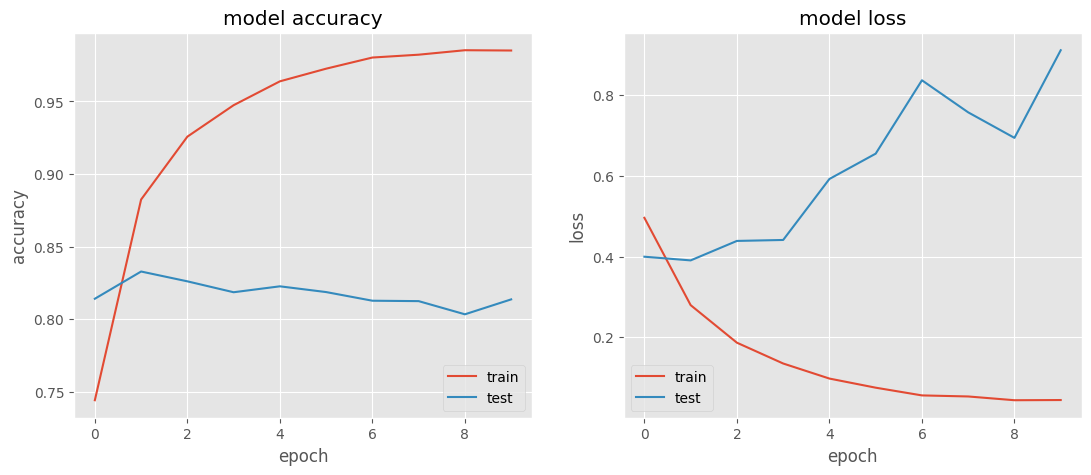

In [18]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left');